Classification Report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      0.67      0.80         3

    accuracy                           0.89         9
   macro avg       0.93      0.83      0.86         9
weighted avg       0.90      0.89      0.88         9

Accuracy Score: 0.8888888888888888
Precision Score: 1.0


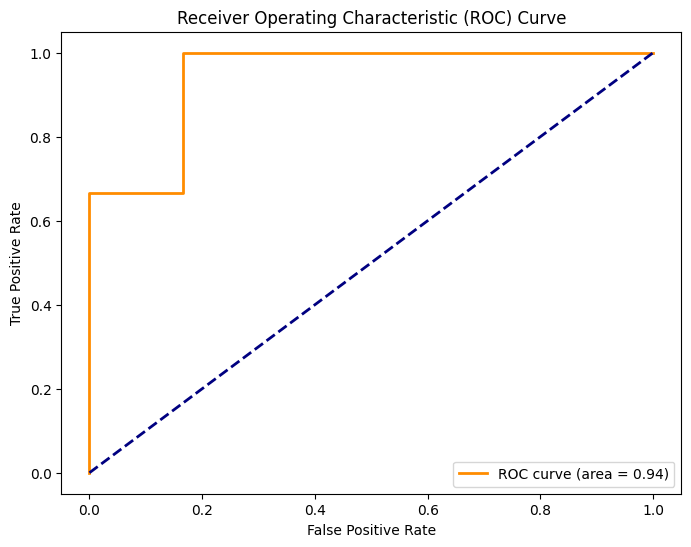

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, roc_curve, auc

# Load the data
data_path = '../data/processed/cleaned_flood_data.csv'
df = pd.read_csv(data_path)

# Define features and target variable
X = df[['exposed_(mn)', 'killed', 'duration(days)']]
y = df['displaced_(k)']  # Original target variable

# Bin target into high/low categories for classification
y_binned = np.where(y > y.median(), 1, 0)  # 1 for high displacement, 0 for low

# Split data with the binned target variable
X_train, X_test, y_train_binned, y_test_binned = train_test_split(X, y_binned, test_size=0.2, random_state=42)

# Initialize and train the classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train_binned)

# Predict on the test set
y_pred_binned = model.predict(X_test)

# Generate classification report
print("Classification Report:\n", classification_report(y_test_binned, y_pred_binned))
print("Accuracy Score:", accuracy_score(y_test_binned, y_pred_binned))
print("Precision Score:", precision_score(y_test_binned, y_pred_binned))

# Predict probabilities for ROC
y_prob = model.predict_proba(X_test)[:, 1]  # Probability of the positive class

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test_binned, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()